### More plotting with `matplotlib` and `seaborn`

Today we continue to work with `matplotlib`, focusing on customization and using subplots.  Also, the `seaborn` library will be introduced as a second visualization library with additional functionality for plotting data.

In [1]:
#!pip install -U seaborn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Subplots and Axes

![](https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png)

In [ ]:
### create a 1 row 2 column plot


In [ ]:
### add a plot to each axis
fig, ax = plt.subplots(1, 2)


In [ ]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot
fig, ax = plt.subplots(2, 2, figsize = (10, 8))


### Exploratory Data Analysis

![](https://m.media-amazon.com/images/I/41lcv%2B1JqRL._AC_SY200_QL15_.jpg)

> *Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.* -- [IBM](https://www.ibm.com/think/topics/exploratory-data-analysis)


#### Introduction to `seaborn`

The `seaborn` library is built on top of `matplotlib` and offers high level visualization tools for plotting data.  Typically a call to the `seaborn` library looks like:

```
sns.plottype(data = DataFrame, x = x, y = y, additional arguments...)
```

In [3]:
### load a sample dataset on tips
tips = sns.load_dataset('tips')
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

<Axes: xlabel='tip'>

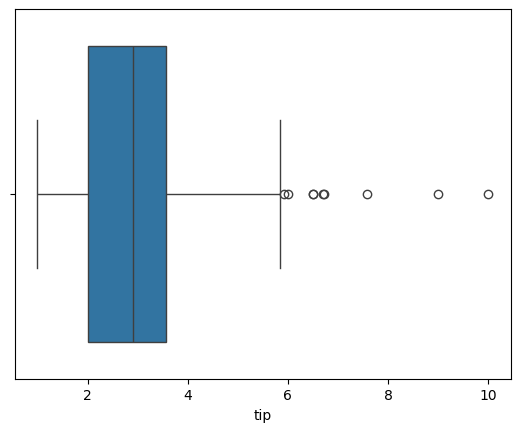

In [4]:
### boxplot of tips
sns.boxplot(data = tips, x = 'tip')

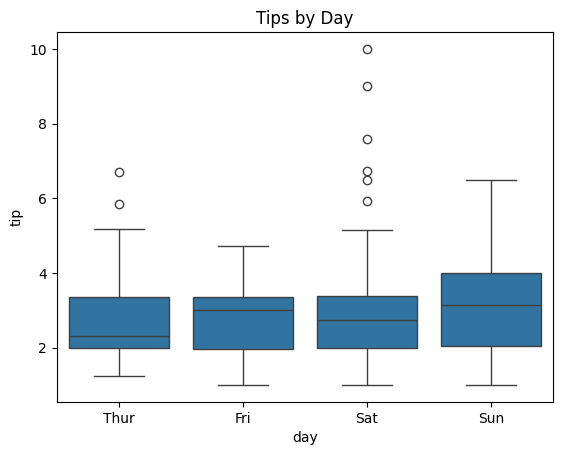

In [5]:
### boxplot of tips by day
sns.boxplot(data = tips, x = 'day', y = 'tip')
plt.title('Tips by Day');

#### `hue`

The `hue` argument works like a grouping helper with `seaborn`.  Plots that have this argument will break the data into groups from the passed column and add an appropriate legend.

<Axes: xlabel='day', ylabel='tip'>

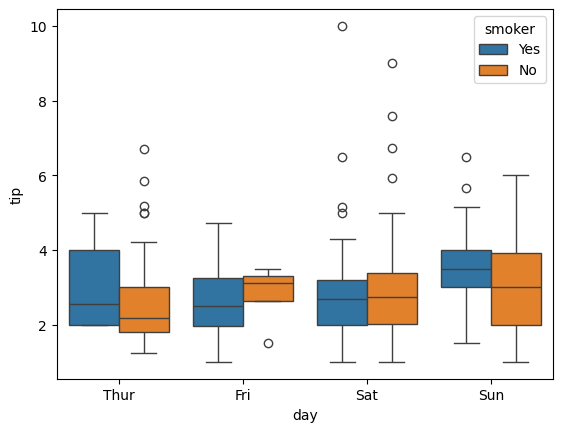

In [6]:
### boxplot of tips by day by smoker
sns.boxplot(data = tips, x = 'day', y = 'tip', hue = 'smoker')

#### `displot`

For visualizing one dimensional distributions of data.

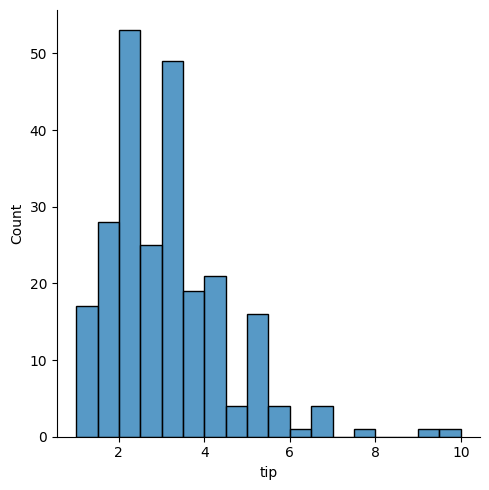

In [7]:
### histogram of tips
sns.displot(data = tips, x = 'tip')

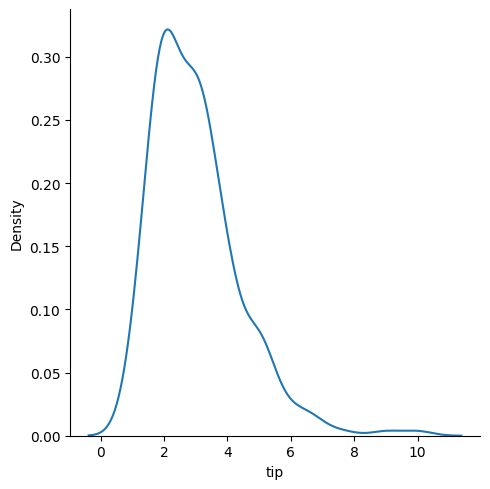

In [8]:
### kde plot
sns.displot(data = tips, x = 'tip', kind = 'kde')

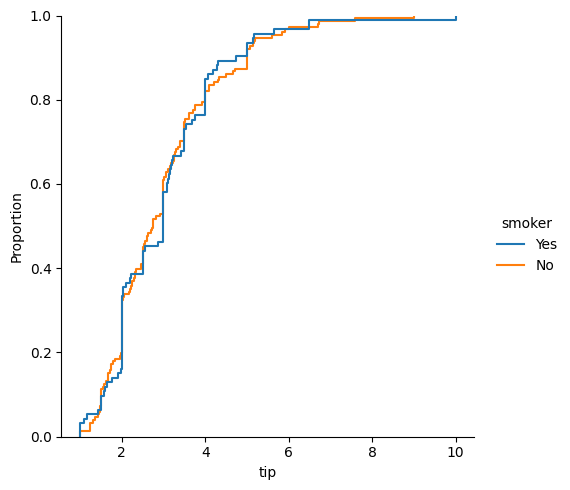

In [9]:
### empirical cumulative distribution plot of tips by smoker
sns.displot(data = tips, x = 'tip', kind = 'ecdf', hue = 'smoker')

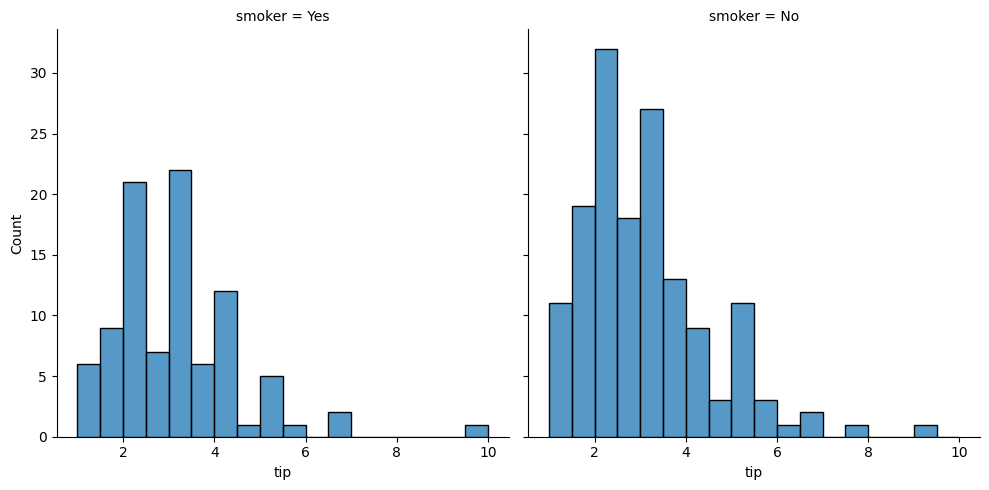

In [10]:
### using the col argument
sns.displot(data = tips, x = 'tip', col = 'smoker')

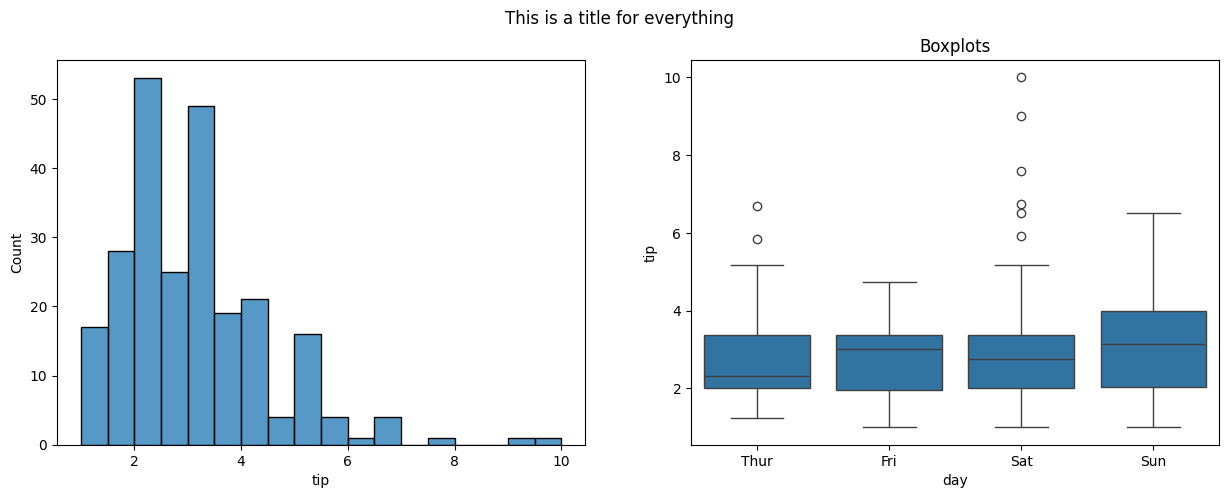

In [11]:
#draw a histogram and a boxplot using seaborn on two axes
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(data = tips, x = 'tip', ax = ax[0])
sns.boxplot(data = tips, x = 'day', y = 'tip', ax = ax[1])
ax[1].set_title('Boxplots')
fig.suptitle('This is a title for everything');

#### `relplot`

For visualizing relationships.

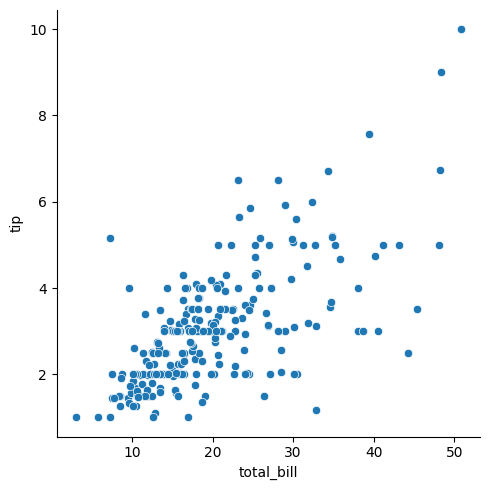

In [12]:
### relplot of bill vs. tip
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

<Axes: xlabel='total_bill', ylabel='tip'>

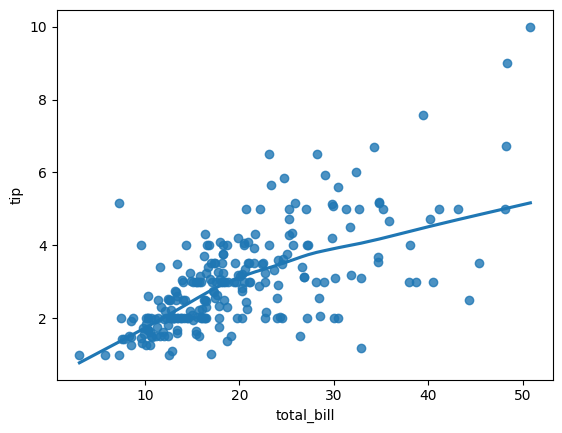

In [13]:
### regression plot
sns.regplot(data = tips, x ='total_bill', y = 'tip', lowess = True )

<Axes: xlabel='smoker', ylabel='tip'>

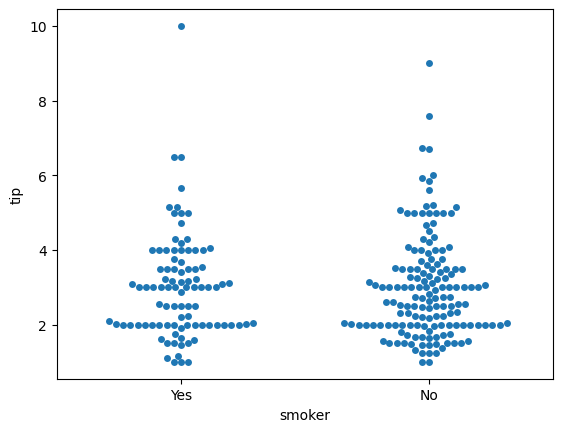

In [14]:
### swarm
sns.swarmplot(data = tips, x = 'smoker', y = 'tip')

<Axes: xlabel='smoker', ylabel='tip'>

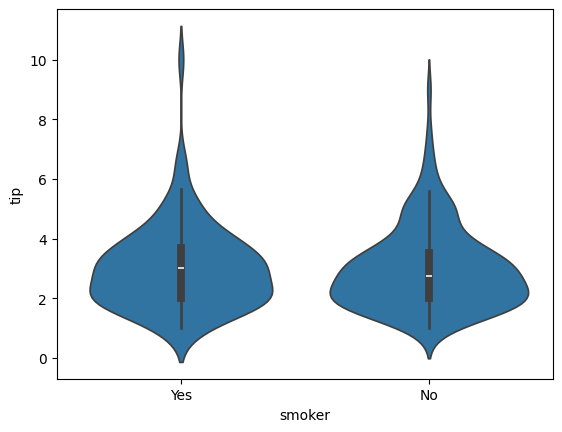

In [15]:
### violin plot
sns.violinplot(data = tips, x = 'smoker', y = 'tip')

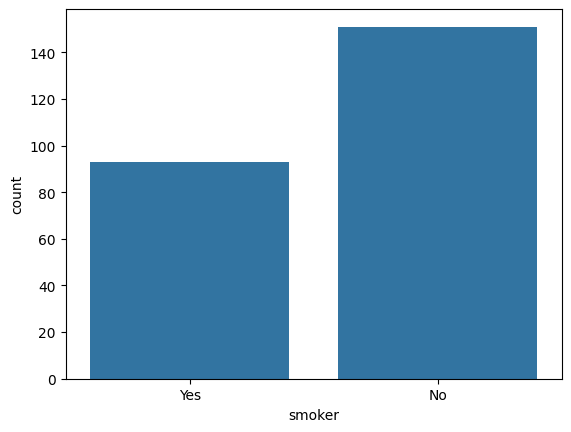

In [16]:
### countplot
sns.countplot(data = tips, x = 'smoker');

#### Additional Plots

- `pairplot`
- `heatmap`

In [17]:
penguins = sns.load_dataset('penguins').dropna()

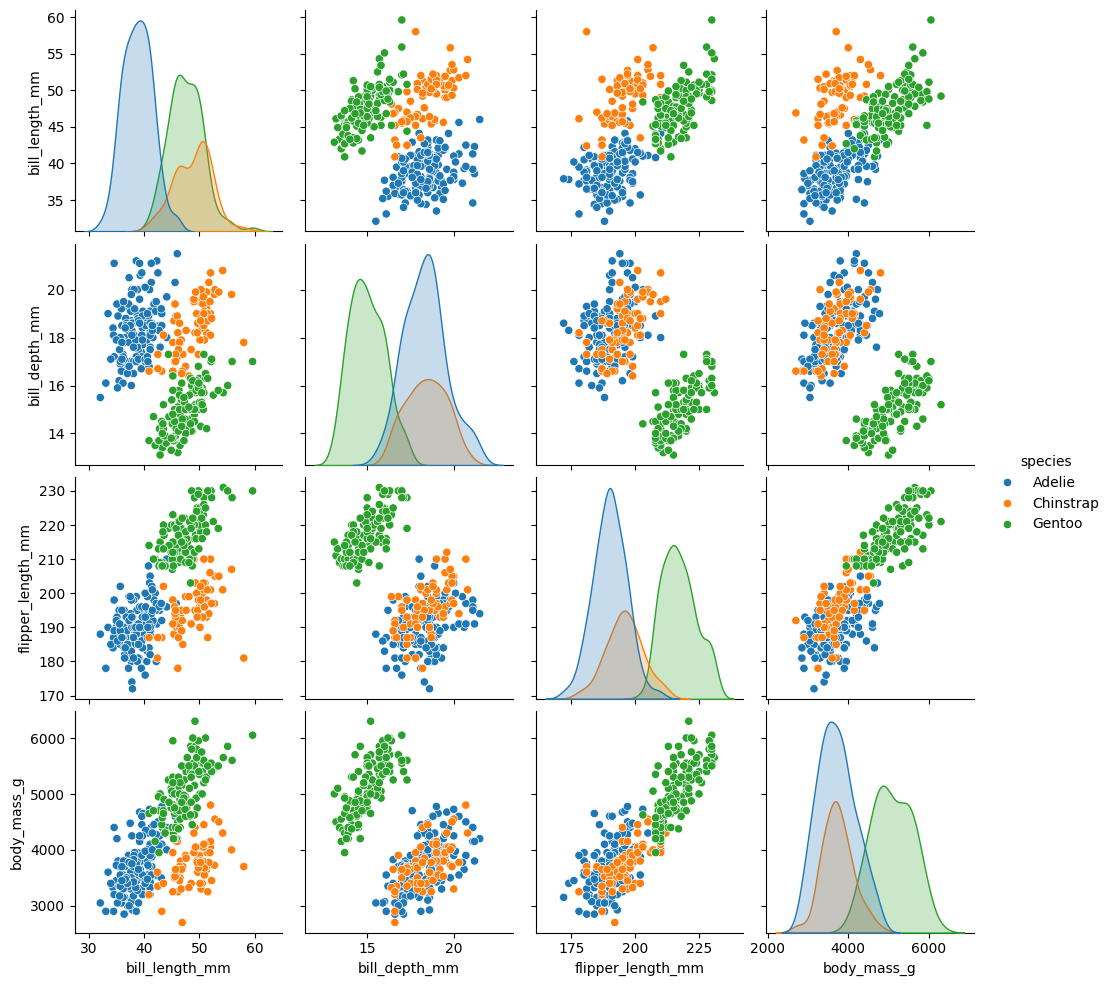

In [45]:
### pairplot of penguins colored by species
sns.pairplot(data = penguins, hue = 'species', diag_kind = 'kde')

In [19]:
### housing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame = True).frame
housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

#### Plotting Correlations

Correlation captures the strength of a linear relationship between features.  Often, this is easier to look at than a scatterplot of the data to establish relationships, however recall that this is only a detector for *linear* relationships!

In [20]:
### correlation in data
housing.corr(numeric_only = True)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

<Axes: >

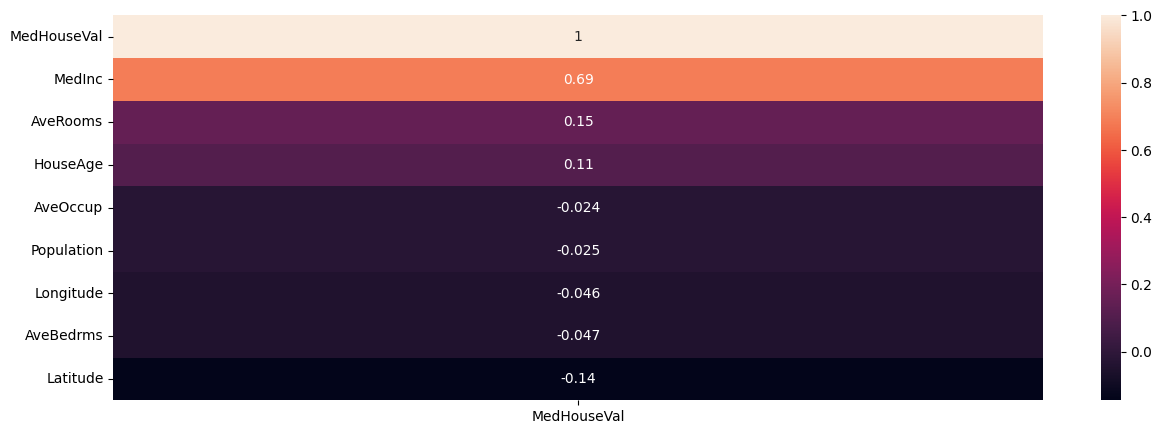

In [21]:
### heatmap of correlations
plt.figure(figsize = (15, 5))
sns.heatmap(housing.corr(numeric_only=True)[['MedHouseVal']].sort_values(by = 'MedHouseVal', ascending = False), annot = True)

#### Problems

Use the `diabetes` data below loaded from OpenML ([docs](https://www.openml.org/search?type=data&sort=runs&status=active&id=37)).  

In [22]:
from sklearn.datasets import fetch_openml

In [23]:
diabetes = fetch_openml(data_id = 37).frame

In [24]:
diabetes.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

1. Plot distribution of ages separated by class.

2. Use the plots below to determine which feature has the most distinct difference between classes?

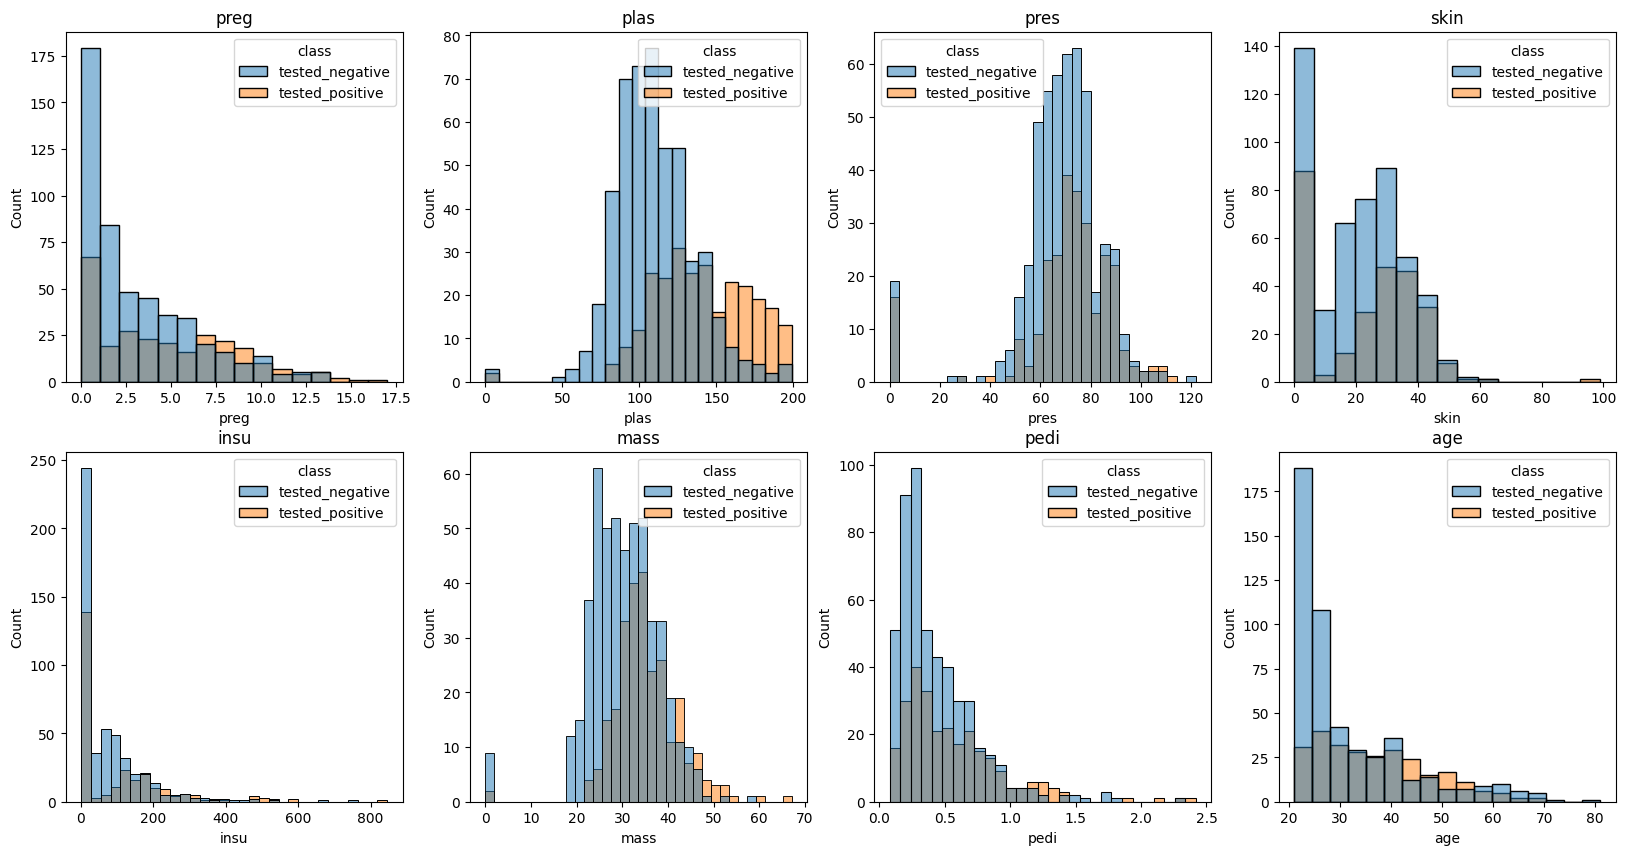

In [40]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
colnum = 0
for row in range(2):
    for col in range(4):
        sns.histplot(data = diabetes, x = diabetes.iloc[:,colnum], hue = 'class', ax =  ax[row, col])
        ax[row,col].set_title(diabetes.columns.tolist()[colnum])
        colnum += 1

3. Head over the the seaborn documentation [here](https://seaborn.pydata.org/). Find a different plot type or function and implement it using the diabetes data.

### Partner Exercise

- What time of year is most popular for bike rentals? 
- What’s the most popular day of the week for bike rentals?
- What’s the frequency of use for the average user? 
- What are the most and least congested bike stations?

In [38]:
bikeshare_hour = pd.read_csv('data/hour.csv')

In [39]:
bikeshare_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1